In [25]:
import os
import numpy as np
import scipy.io as io


In [106]:
print(not False)


True


In [28]:
##  Data Preparation
# Save data in txt format
filepath_DB5 = 'C:\\Users\\57600\\Desktop\\Research records\\NinaProDB5'

In [53]:
datapath = filepath_DB5 +'\\S2_E2_A1.mat'
emg = io.loadmat(datapath)['emg']
label = io.loadmat(datapath)['restimulus']
cycle = io.loadmat(datapath)['rerepetition']

In [80]:
emg_data = emg[np.nonzero(np.logical_and(cycle==6, label==1))[1]][:,0:16]
print(np.shape(emg_data))

(580, 16)


In [90]:
import utils
a = utils.read_emg_from_txt('Dataset\\Intact_dataset\\Participant1\\test\\EMG\\gesture_0_',1)
print(np.shape(a))

(680, 16)


In [92]:
filtered = utils.filter_data(np.transpose(a))

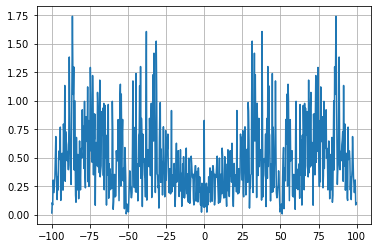

In [99]:
from scipy.fft import fft, fftfreq, fftshift
T = 1.0/200.0
N = 680
yf = fft(np.transpose(a)[0])
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [85]:
from prepare_dataset_utils import butter_bandpass_filter

channel = butter_bandpass_filter(emg_data.transpose()[0], lowcut=20, highcut=495, fs=1000, order=4)

channel2 = butter_bandpass_filter(emg_data.transpose()[0][:20], lowcut=20, highcut=495, fs=1000, order=4)

In [86]:
channel[:20] == channel2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [74]:
import json
f = open('NinaproDB5.json')
team = json.load(f)

In [76]:
type(team['class_array'])

list

In [12]:
import numpy as np
import torch
from load_prepared_dataset_in_dataloaders import load_dataloaders, load_dataloaders_ours

In [5]:
participants_dataloaders_train, \
participants_dataloaders_validation, \
participants_dataloaders_test = \
    load_dataloaders(path="Dataset/processed_dataset", number_of_cycle=3,batch_size=256)

In [7]:
print(len(participants_dataloaders_test[0]))

3


In [10]:
for inputs, labels in participants_dataloaders_test[0]:
    print(inputs.size())
    print(labels.size())

torch.Size([256, 1, 16, 50])
torch.Size([256])
torch.Size([256, 1, 16, 50])
torch.Size([256])
torch.Size([256, 1, 16, 50])
torch.Size([256])


In [13]:
train_dataset, validation_dataset, test_dataset = load_dataloaders_ours("Dataset/ours/processed_dataset/Participant1", number_of_cycle=3)
#  Eech dataset: [participants * torch.utils.data.dataloader.DataLoader]
print(len(train_dataset.dataset))
print(len(validation_dataset.dataset))
print(len(test_dataset.dataset))

7187
7187
816


In [24]:
from Models.rawConvNet import Model
participants_dataloaders_test = test_dataset

CLASS_N = 6
BLOCK_N = 3
FILTER_SIZE = (1, 16)

model = Model(number_of_class=CLASS_N, number_of_blocks=BLOCK_N, number_of_channels=16, dropout_rate=.35, filter_size=FILTER_SIZE )

path_weights = 'weights/ours/TL_best_weights.pt'

best_weights = torch.load(path_weights, map_location=torch.device('cpu'))
model.load_state_dict(best_weights)


predictions = []
ground_truth = []
accuracies = []


with torch.no_grad():
    model.eval()
    for inputs, labels in participants_dataloaders_test:
        inputs = inputs
        output, _ = model(inputs)
        _, predicted = torch.max(output.data, 1)
        predictions.extend(predicted.cpu().numpy())
        ground_truth.extend(labels.numpy())
        
        
        
print(" Accuracy: ", np.mean(np.array(predictions) == np.array(ground_truth)))

Model(
  (_features_extractor): ModuleList(
    (0): Sequential(
      (conv2D_0): Conv2d(1, 64, kernel_size=(1, 16), stride=(1, 1))
      (batchNorm_0): BatchNorm2d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
      (leakyRelu_0): LeakyReLU(negative_slope=0.1, inplace=True)
      (dropout2D_0): Dropout2d(p=0.35, inplace=False)
    )
    (1): Sequential(
      (conv2D_1): Conv2d(64, 64, kernel_size=(1, 16), stride=(1, 1))
      (batchNorm_1): BatchNorm2d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
      (leakyRelu_1): LeakyReLU(negative_slope=0.1, inplace=True)
      (dropout2D_1): Dropout2d(p=0.35, inplace=False)
    )
    (2): Sequential(
      (conv2D_2): Conv2d(64, 64, kernel_size=(1, 16), stride=(1, 1))
      (batchNorm_2): BatchNorm2d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
      (leakyRelu_2): LeakyReLU(negative_slope=0.1, inplace=True)
      (dropout2D_2): Dropout2d(p=0.35, inplace=False)
    )
  )
  

In [21]:
path_weights = 'weights/ours/TL_best_weights.pt'
best_weights = torch.load(path_weights, map_location=torch.device('cpu'))
type(best_weights)

collections.OrderedDict

In [ ]:
read_data(path, number_of_gestures=7, number_of_cycles=16, window_size=200, size_non_overlap=50)
--> to save data as RAW_INT_train(valid,test).npy



get_data_and_process_it_from_file(get_train_data, path, number_of_gestures=7, number_of_cycles=16, window_size=151,                            size_non_overlap=50)

format_examples(emg_examples, window_size=150, size_non_overlap=50)

read_emg_from_txt(path_emg, gesture_index)

segment_emg_gestures(path_emg, number_of_gestures, window_size, size_non_overlap, ref_max=None, ref_min=None)


